In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# config

In [2]:
WORD_LIST = ["god", "jesus", "mary", "joseph", "woman", "man"]

# load vectors

In [3]:
def load_vectors(path_list):
    vector_dict_list = []
    for path in path_list:
        with open(path, "rb") as f:
            vector_dict_list.append(pickle.load(f))
    return vector_dict_list

vf, vg, vw = load_vectors(["/veld/input/fasttext/m1.pkl", "/veld/input/glove/m1.pkl", "/veld/input/word2vec/m1.pkl"])
print("len(vf):", len(vf))
print("len(vg):", len(vg))
print("len(vw):", len(vw))

len(vf): 5278
len(vg): 5278
len(vw): 5277


# quick plausability check

In [4]:
def get_cosine_similarity_of_vectors(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [5]:
print("fasttext")
print("god-jesus:", get_cosine_similarity_of_vectors(vf["god"], vf["jesus"]))
print("god-lamb:", get_cosine_similarity_of_vectors(vf["god"], vf["lamb"]))
print("glove")
print("god-jesus:", get_cosine_similarity_of_vectors(vf["god"], vg["jesus"]))
print("god-lamb:", get_cosine_similarity_of_vectors(vf["god"], vg["lamb"]))
print("word2vec")
print("god-jesus:", get_cosine_similarity_of_vectors(vf["god"], vw["jesus"]))
print("god-lamb:", get_cosine_similarity_of_vectors(vf["god"], vw["lamb"]))

fasttext
god-jesus: 0.41064027
god-lamb: 0.22323422
glove
god-jesus: -0.12452808235351119
god-lamb: 0.086432337443404
word2vec
god-jesus: 0.0614147
god-lamb: -0.069948554


# create sample

In [6]:
def create_sample_vector_dict(vector_dict, word_list):
    vector_dict_new = {}
    for word in word_list:
        vector_dict_new[word] = vector_dict[word]
    return vector_dict_new

vf_sample = create_sample_vector_dict(vf, WORD_LIST)
vg_sample = create_sample_vector_dict(vg, WORD_LIST)
vw_sample = create_sample_vector_dict(vw, WORD_LIST)

# t-SNE plot

In [7]:
def show_plot_t_sne(vector_dict, title):
    labels = list(vector_dict.keys())
    values = np.array(list(vector_dict.values()))
    
    # transform t-SNE
    tsne = TSNE(n_components=2, perplexity=1, random_state=42)
    reduced_vectors_tsne = tsne.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1], c='green', alpha=0.7)
    
    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_tsne[i, 0], 
            reduced_vectors_tsne[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )

    # plot
    plt.title(title)
    plt.show()

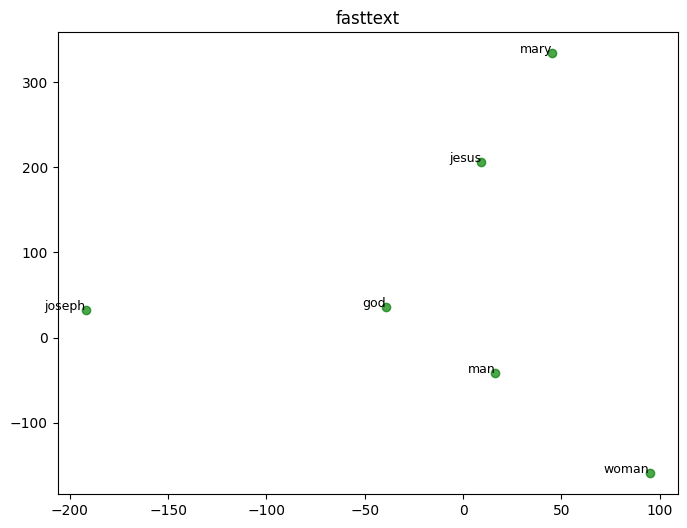

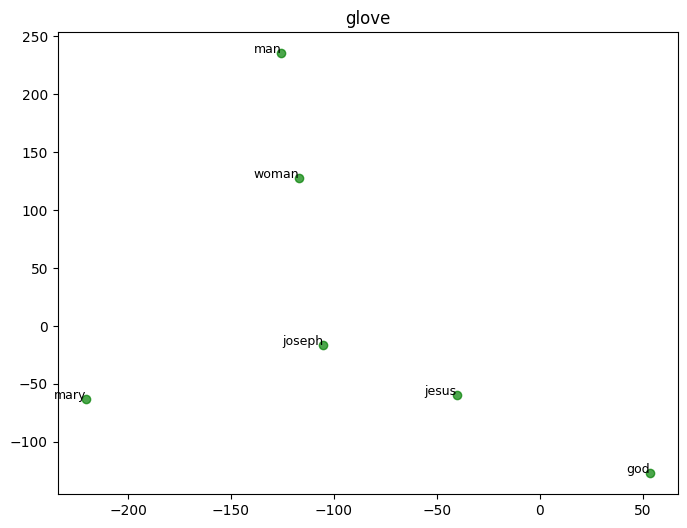

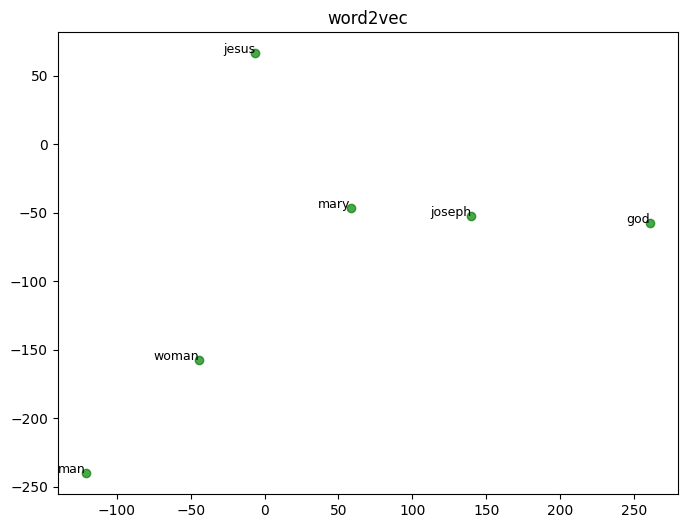

In [8]:
show_plot_t_sne(vf_sample, "fasttext")
show_plot_t_sne(vg_sample, "glove")
show_plot_t_sne(vw_sample, "word2vec")

# PCA plot

In [9]:
def show_plot_pca(vector_dict, title):
    labels = list(vector_dict.keys())
    values = np.array(list(vector_dict.values()))
    
    # transform
    pca = PCA(n_components=2)
    reduced_vectors_pca = pca.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], c='blue', alpha=0.7)

    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_pca[i, 0], 
            reduced_vectors_pca[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )
        
    # plot
    plt.title(title)
    plt.show()

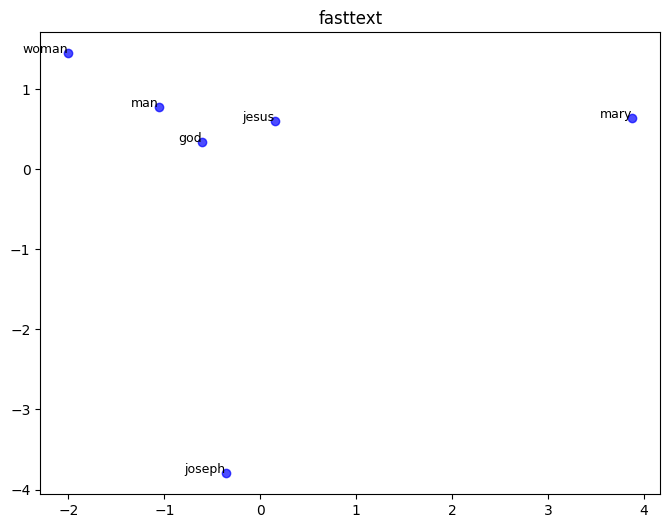

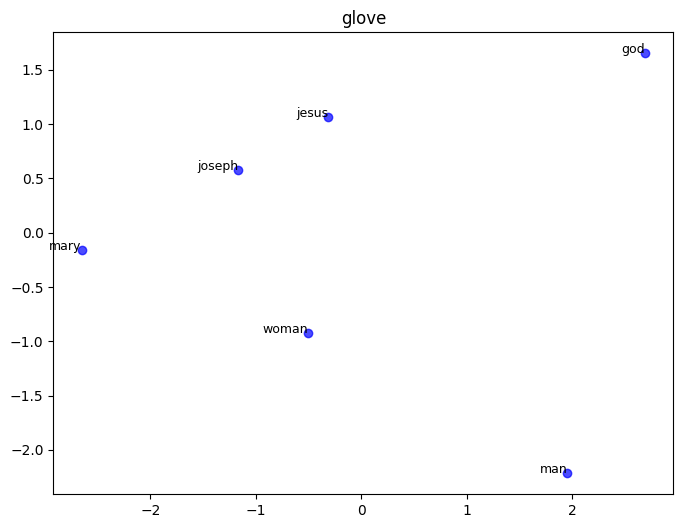

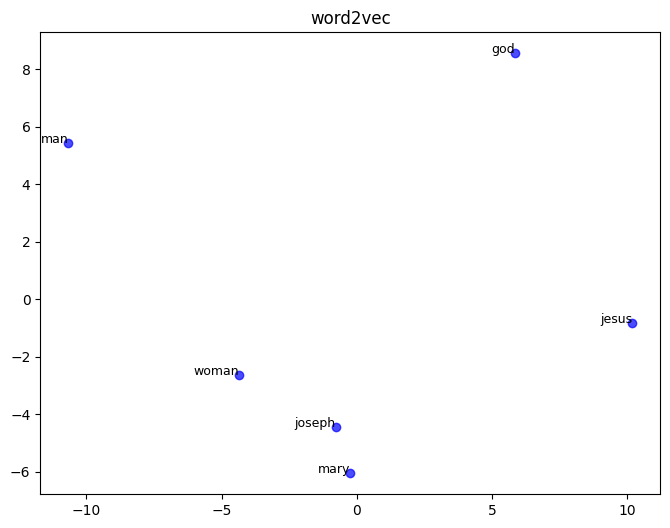

In [10]:
show_plot_pca(vf_sample, "fasttext")
show_plot_pca(vg_sample, "glove")
show_plot_pca(vw_sample, "word2vec")